#**Project Omega**

##Importation and Installation of methods
For this project, we will use different packages. The main part will be about text mining. For this, we will use packages seen in class, which are *spacy*, *nltk* and *enchant*. 

In [2]:
import nltk
!pip install spacy
!apt install -qq enchant
!pip install pyenchant
!pip install nltk
!python -m spacy download en
nltk.download('punkt')
nltk.download('wordnet')

The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,310 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Preconfiguring packages ...
Selecting previously unselected package libtext-iconv-perl.
(Reading database ... 134983 files and directories currently installed.)
Preparing to unpack .../0-libte

True

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import spacy
from spacy.lang.en import English
import enchant
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
import collections
import operator

##Data Cleaning <br>
We first began by separate tweet by gender. We made new tables, one for male, one for female, one for brand and one with the unknown gender. <br>
We are not interested by all the feautres (columns), we kept the "gender", the "text" and the "name" for the brand. <br>
We chose to split the data by gender to be able to construct general BOW for each gender.

In [0]:
#Import data
data = pd.read_csv('https://raw.githubusercontent.com/XaviJunior/omega/Data/Data/gender-classifier-DFE-791531.csv',encoding="latin-1")
textgender=data[["gender","text",'description']]
X=textgender[["text",'description']]
y=textgender["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
train= pd.concat([X_train.reset_index(drop='Tru‌​e'),y_train.reset_index(drop='Tru‌​e')],axis=1)
test=pd.concat([X_test.reset_index(drop='Tru‌​e'),y_test.reset_index(drop='Tru‌​e')],axis=1)
#New Table with Male Only and Split in Test/Train Data
Male = train[train['gender'] == 'male']
Maletext=Male["text"]
ym=Male["gender"]
ListMale=Maletext.values.tolist()

#New Table with Female Only and split in Test/Train Data
Female = train[train['gender'] == 'female']
Femaletext=Female["text"]
yf=Female["gender"]
ListFemale=Femaletext.values.tolist()

#New Table with Unknown Only
Unknown=train[train['gender'] == 'unknown']
Unktext=Unknown["text"]
ListUnk=Unktext.values.tolist()

#New Table with Brand Only
Brand = data[data['gender'] == 'brand']
Brandtext=Brand[["text"]]
ListBrand=Brandtext.values.tolist()
txtLen = []
for i in data["text"]:
  txtTab=list(i.split(" "))
  tLen = len(txtTab)
  txtLen.append(tLen) 
data["text_len"] = txtLen

###Merging
Now that we create different table for both gender. We will merge all the tweets in two documents, for one male and one for female. We do that because we are interested to know which words are the most used by male and female.

In [0]:
#Merge all Male Text in a single string
TextMale=" "
for i in range(0,len(ListMale)):
  TextMale=TextMale+ListMale[i]
textmale=TextMale.lower()

#Merge all Female Text in a single string
TextFemale=" "
for i in range(0,len(ListFemale)):
  TextFemale=TextFemale+ListFemale[i]
textfemale=TextFemale.lower()

In [0]:
#Cleaning function
def cleaning(input):
  nlp = English()
  Doc=nlp(input)
  Token = []
#Check if words in english dictionnary
  for token in Doc:
    Token.append(token.text)
  Words=[]
  d = enchant.Dict("en_US")
  Text=''
  for i in Token:
    if d.check(i)==True:
      Text+=' '+i
  doc=nlp(Text)
#Remove stop words and punctuation
  for word in doc:
    if word.is_stop==False and word.is_punct==False:
      Words.append(word)
  words=''
#Lemmatization
  for j in Words:
    o=str(j)
    lemm=lemmatizer.lemmatize(o)
    words+=lemm+' '
  words=words.lower()
  return(words)

In [0]:
#Function to remove tokens of a dictionnary
def removekey(d, key):
  r = dict(d)
  del r[key]
  return r

###Exploratory Data Analysis

In [0]:
Fem=cleaning(textfemale)
Mal=cleaning(textmale)

In [0]:
Fem1=Fem.split(' ')
Mal1=Mal.split(' ')

In [10]:
F=collections.Counter(Fem1)
M=collections.Counter(Mal1)
F=removekey(F,'')
M=removekey(M,'')
MM = sorted(M.items(), key=operator.itemgetter(1),reverse=True)
FF = sorted(F.items(), key=operator.itemgetter(1),reverse=True)
print(FF)
print(MM)

[('like', 351), ('day', 265), ('love', 252), ('time', 208), ('people', 185), ('know', 176), ('want', 174), ('got', 159), ('new', 151), ('best', 146), ('amp', 144), ('thing', 135), ('need', 132), ('u', 120), ('good', 119), ('think', 112), ('life', 110), ('make', 109), ('come', 104), ('right', 102), ('look', 99), ('work', 99), ('way', 99), ('friend', 98), ('girl', 97), ('2', 96), ('today', 95), ('year', 95), ('going', 90), ('feel', 90), ('m', 84), ('world', 83), ('home', 83), ('shit', 81), ('great', 80), ('thank', 80), ('follow', 78), ('favorite', 76), ('let', 75), ('week', 72), ('forevermore', 72), ('person', 67), ('little', 64), ('vote', 60), ('happy', 60), ('fuck', 60), ('guy', 59), ('school', 58), ('tell', 58), ('hope', 58), ('live', 56), ('night', 56), ('watch', 55), ('hate', 54), ('wanna', 54), ('better', 53), ('help', 52), ('voted', 52), ('said', 52), ('having', 51), ('3', 50), ('birthday', 50), ('family', 49), ('hair', 49), ('getting', 49), ('miss', 49), ('1', 49), ('class', 48),

In [11]:
#10 mots les plus utilisés par les go's et leur fréquence
FM = pd.DataFrame(FF)
FM.head(10)

,0,1
0,like,351
1,day,265
2,love,252
3,time,208
4,people,185
5,know,176
6,want,174
7,got,159
8,new,151
9,best,146


In [12]:
#10 mots les plus utilisés par les mec et leur fréquence
MP = pd.DataFrame(MM)
MP.head(10)

,0,1
0,like,269
1,time,181
2,new,173
3,love,162
4,got,151
5,know,150
6,day,149
7,people,147
8,good,128
9,need,128


In [13]:
import numpy as np
import matplotlib.pyplot as plt

#récupe des 10 mots les plus utiliser par les hommes et leur fréquences
Mec = MP[1].tolist()
MecMot = MP[0].tolist()
MecMot = MecMot[:10]
MEC = Mec[:10]
MEC

#récupe de tout les mots utilisés par les femmes
Meuf = FM[1].tolist()
MeufMot = FM[0].tolist()
#Tableau conçu pour repertorier le nb de fois que chaque mots est utilisé par les femmes
meufRk = []
#Boucle for qui récupère le nombre de fois que les mots les plus utilisé par les hommes sont utilisé par les femmes.
#la boucle récupère d'abord le mot utilisé par les hommes, ensuite le cherche dans le frame des femmes.
#finalement, une fois trouvé, il récupère combien de fois il est utilisé par les femmes et l'append au tableau ci-dessus
for i in MecMot:
  if i in MeufMot:
    lot = FM[FM[0] == i][1]
    loti = int(lot)
    meufRk.append(loti)

meufRk
#set des datas des femmes qu'on va plotter, soit le nombre de fois qu'elles utilisent les mots les plus utilisé par les homes
MEUF = meufRk
MEUF

[351, 208, 151, 252, 159, 176, 265, 185, 119, 132]

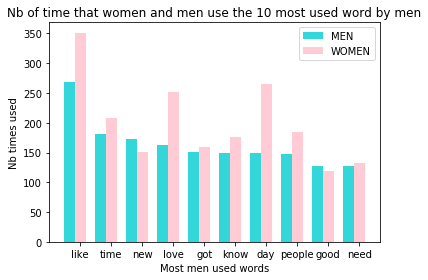

In [14]:
#bar-plot des mots les plus utiliser par les hommes, comparé avec l'utilisation de ses mots par les femmes
# data to plot, le nombre de x qu'un homme et une femme utilise les mots les plus utilisé par les hommes
n_groups = 10
MEC
MEUF

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, MEC, bar_width,
alpha=opacity,
color='darkturquoise',
label='MEN')

rects2 = plt.bar(index + bar_width, MEUF, bar_width,
alpha=opacity,
color='pink',
label='WOMEN')

plt.xlabel('Most men used words')
plt.ylabel('Nb times used')
plt.title('Nb of time that women and men use the 10 most used word by men')
plt.xticks(index + bar_width, MP[0])
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
#récupe des mots 10 les plus utiliser par les femmes et leur fréquences
go = FM[1].tolist()
goMot = FM[0].tolist()
goMot = goMot[:10]
GO = go[:10]
GO

#récupe de tout les mots utilisés par les hommes
gars = MP[1].tolist()
garsMot = MP[0].tolist()
#Tableau conçu pour repertorier le nb de fois que chaque mots est utilisé par les hommes
garsRk = []
#Boucle for qui récupère le nombre de fois que les mots les plus utilisés par les femmes sont utilisé par les hommes.
#la boucle récupère d'abord le mot utilisé par les femmes, ensuite le cherche dans le frame des hommes.
#finalement, une fois trouvé, il récupère combien de fois il est utilisé par les homme et l'append au tableau ci-dessus 
for i in goMot:
  if i in garsMot:
    lot = MP[MP[0] == i][1]
    loti = int(lot)
    garsRk.append(loti)

garsRk
#set des datas des homme qu'on va plotter, soit le nombre de fois qu'ils utilisent les mots les plus utilisé par les femmes
GARS = garsRk
GARS


[269, 149, 162, 181, 147, 150, 110, 151, 173, 111]

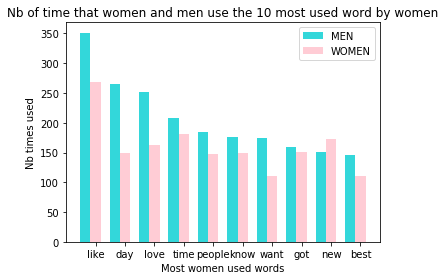

In [16]:
#bar plot des mots les plus utiliser par les femmes, comparé avec l'utilisation de ses mots par les hommes
# data to plot, le nombre de x qu'un homme et une femme utilise les mots les plus utilisé par les femmes
n_groups = 10
GO
GARS

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, GO, bar_width,
alpha=opacity,
color='darkturquoise',
label='MEN')

rects2 = plt.bar(index + bar_width, GARS, bar_width,
alpha=opacity,
color='pink',
label='WOMEN')

plt.xlabel('Most women used words')
plt.ylabel('Nb times used')
plt.title('Nb of time that women and men use the 10 most used word by women')
plt.xticks(index + bar_width, FM[0])
plt.legend()

plt.tight_layout()
plt.show()

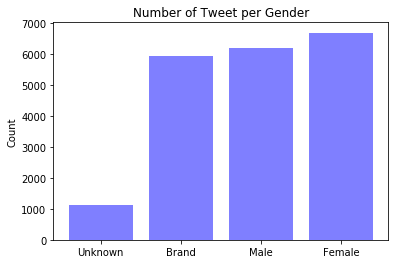

In [18]:
table=data.groupby('gender').count()['text'].sort_values(ascending=True)
objects = ('Unknown', 'Brand', 'Male', 'Female')
y_pos = np.arange(len(objects))
plt.bar(y_pos, table, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Number of Tweet per Gender')
plt.show()

###Base Rate
The first thing we think it is interessant to know is the base rate. With this in mine, we could be able to tell if our models are good or not. If the base rate is better than our accuracy, we will be better of by predicting the base rate gender for any tweets.

In [23]:
counter=collections.Counter(y)
if counter['female']>counter['unknown'] and counter['female']>counter['male'] and counter['female']>counter['brand']:
  BaseRate=counter['female']/len(y)
  print('General base Rate is: ',BaseRate*100,'% of female.')
elif counter['male']>counter['unknown'] and counter['male']>counter['female'] and counter['male']>counter['brand']:
  BaseRate=counter['male']/len(y)
  print('General base Rate is: ',BaseRate*100,'% of male.')
elif counter['brand']>counter['unknown'] and counter['brand']>counter['female'] and counter['brand']>counter['male']:
  BaseRate=counter['brand']/len(y)
  print('General base Rate is: ',BaseRate*100,'% of brand.')
else:
  BaseRate=counter['unknown']/len(y)
  print('General base Rate is: ',BaseRate*100,'% of unknown.')

General base Rate is:  33.416458852867834 % of female.


For our project, the genral base rate doesnt make any sence. In our case, we are only interested by male and female.

In [24]:
if counter['female']>counter['male']:
  BaseRate_FM=counter['female']/(counter['female']+counter['male'])
  print('Base Rate is: ',BaseRate_FM*100,'% of female.')
else:
  BaseRate_FM=counter['male']/(counter['female']+counter['male'])
  print('Base Rate is: ',BaseRate_FM*100,'% of male.')

Base Rate is:  51.96215293935163 % of female.


If we find an accuracy higher than 51.14%, our model will make better prediction than just labelised each tweet as written by female.

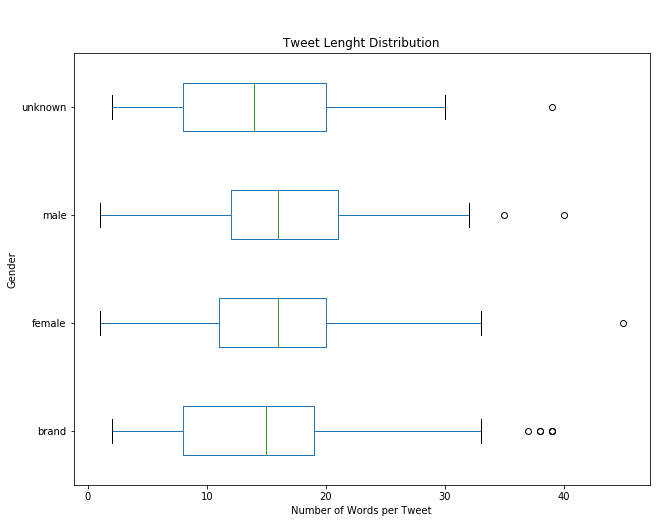

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
Boxplot=data.boxplot(column=['text_len'], by='gender',ax=ax, vert=False, grid =False,)
plt.title('Tweet Lenght Distribution')
plt.xlabel('Number of Words per Tweet')
plt.ylabel('Gender')
plt.suptitle(' ')
plt.show()